## Bibliotecas Usadas

In [359]:
import matplotlib.pyplot as plt
import numpy as np
import math
import json
import random
from sklearn import datasets
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing

## Hiperparâmetros e constantes

In [360]:
a = 0.4
err = 0.00000001
limit = 70000
random.seed(7)

## Leitura dos dados

A função abaixo abre os arquivos onde estão salvos os dados e os salva em três listas de features.

In [361]:
def readData(path):
    try:
        f = open(path)
    except:
        print("Houston we've got a file problem")
        return
    dataset = [[],[],[]]
    for i in f:
        stringList = i.split()
        try:
            for j in range(len(dataset)):
                if j < len(stringList):
                    dataset[j].append(float(stringList[j]))
                else:
                    f.close()
                    return
        except ValueError:
            print("You had a Value Error")
            f.close()
            return
        except:
            print("You got another Error")
            f.close()
            return
    f.close()
    return dataset

Esta função separa os dados em conjunto de treino e conjunto de teste.

In [362]:
def splitData(dataset):
    trainset = [0,1,2]
    testset = [0,1,2]
    trainset[0], testset[0], trainset[1], testset[1], trainset[2], testset[2] = train_test_split(dataset[0], dataset[1], dataset[2], test_size=0.1, random_state=7)
    return trainset, testset

Esta outra transforma as listas de features em uma lista de pontos.

In [363]:
def getPointList(dataset):
    pointList = []
    for i in range(len(dataset[0])):
        point = []
        for j in dataset:
            point.append(j[i])
        pointList.append(point)
    return pointList

In [364]:
def getList(points):
    lists = []
    for i in range(len(points[0])):
        lists.append([])
    for i in points:
        for j in range(len(i)):
            lists[j].append(i[j])
    return lists

## Plotando gráficos

In [365]:
def plotPoints(dataset):
    fig = plt.figure()
    ax = fig.add_subplot(projection="3d")
    X, Y =  np.meshgrid(np.linspace(-3,3,2), np.linspace(0,2,2))
    Z =  np.zeros(X.shape)
    ax.plot_surface(X, Y, Z, shade=False, color="g", alpha=.4)
    ax.plot([-2.5, -2.5, 2.5, 2.5], [0, 1, 1, 0], zdir='z', zs=0, c='g')
    ax.plot([-1.25, -1.25, 1.25, 1.25], [0, 0.05, 0.05, 0], zdir='z', zs=0, c='g')
    ax.scatter(dataset[0],dataset[1],dataset[2])
    return ax

In [366]:
def plotPolynom(dataset,X,Y,Z):
    ax = plotPoints(dataset)
    ax.plot(X,Y,Z)

## Conseguindo Pontos de entrada

In [367]:
def gettingX(start,end,step):
    lengh = end - start + step
    numb = int(lengh/step)
    x = np.linspace(start,end,num = numb)
    return x

# Regressão Linear

In [368]:
def linearRegression(a,x,y,theta,err):
    epoch = 0
    difference = 50
    prevJ = j(linearH,theta,x,y)
    while(difference > err):
        if (epoch > limit):
            break
        temp0 = theta[0] - a*derivative0(linearH,theta,x,y)
        temp1 = theta[1] - a*derivative1(linearH,theta,x,y)
        theta[0] = temp0
        theta[1] = temp1
        nowJ = j(linearH,theta,x,y)
        dif = abs(nowJ - prevJ)
        difference = dif/prevJ
        epoch += 1
        prevJ = nowJ
    print(epoch)
    print(j(linearH,theta,x,y))
    pass

In [369]:
def j(h,theta,x,y):
    summ = 0
    length = len(x)
    for i in range(length):
        summ += math.pow(h(theta,x[i]) - y[i],2)
    return summ/(2*length)

In [370]:
def linearH(theta,x):
    return theta[0] + theta[1]*x

In [371]:
def derivative0(h,theta,x,y):
    summ = 0
    length = len(x)
    for i in range(length):
        summ += h(theta,x[i]) - y[i]
    return summ/length

In [372]:
def derivative1(h,theta,x,y):
    summ = 0
    length = len(x)
    for i in range(length):
        summ += (h(theta,x[i]) - y[i])*x[i]
    return summ/length

## Regressão Polinomial

In [373]:
def generalH(theta,x):
    summ = 0
    for i in range(len(theta)):
        summ += theta[i]*pow(x,i)
    return summ

In [374]:
def derivative(h,theta,x,y,grau):
    summ = 0
    length = len(x)
    for i in range(length):
        summ += (h(theta,x[i]) - y[i])*pow(x[i],grau)
    return summ/length

In [375]:
def polynomialRegression(a,x,y,theta,err,grau):
    epoch = 0
    difference = 50
    prevJ = j(generalH,theta,x,y)
    while(difference > err):
        if (epoch > limit):
            break
        temp = [0]*(grau+1)
        temp[0] = theta[0] - a*derivative0(generalH,theta,x,y)
        for i in range(1,grau+1):
            temp[i] = theta[i] - a*derivative(generalH,theta,x,y,i)
        for i in range(len(temp)):
            theta[i] = temp[i]
        nowJ = j(generalH,theta,x,y)
        dif = abs(nowJ - prevJ)
        difference = dif/prevJ
        epoch += 1
        prevJ = nowJ
    print(epoch)
    print(j(generalH,theta,x,y))
    pass

## Execução

In [376]:
dataset = readData("../data/kick1.dat")
print(dataset)

[[-0.21, -0.305, -0.368, -0.37, -0.48, -0.532, -0.575, -0.583, -0.618, -0.702, -0.783, -0.842, -0.882, -0.93, -0.969, -0.989, -1.032, -1.088, -1.104, -1.192], [2.048, 1.999, 1.968, 1.902, 1.841, 1.807, 1.733, 1.69, 1.649, 1.611, 1.568, 1.523, 1.438, 1.408, 1.34, 1.295, 1.244, 1.201, 1.159, 1.109], [0.145, 0.103, 0.149, 0.11, 0.135, 0.111, 0.12, 0.111, 0.108, 0.117, 0.107, 0.104, 0.139, 0.142, 0.111, 0.107, 0.118, 0.119, 0.126, 0.11]]


In [377]:
dataset2 = readData("../data/kick2.dat")
print(dataset2)

[[-0.105, -0.162, -0.184, -0.185, -0.23, -0.266, -0.287, -0.311, -0.309, -0.331, -0.391, -0.431, -0.441, -0.445, -0.484, -0.514, -0.516, -0.524, -0.552, -0.596], [2.048, 1.999, 1.968, 1.902, 1.841, 1.807, 1.733, 1.69, 1.649, 1.611, 1.568, 1.523, 1.438, 1.408, 1.34, 1.295, 1.244, 1.201, 1.159, 1.109], [0.145, 0.177, 0.172, 0.167, 0.192, 0.219, 0.213, 0.223, 0.25, 0.244, 0.233, 0.269, 0.283, 0.29, 0.263, 0.29, 0.28, 0.281, 0.296, 0.269]]


In [378]:
trainset, testset = splitData(dataset)
print(trainset)
print(testset)

[[-0.368, -0.532, -0.842, -0.21, -1.104, -0.575, -0.93, -1.192, -0.783, -0.969, -0.618, -1.032, -0.702, -0.882, -0.583, -0.37, -0.48, -0.989], [1.968, 1.807, 1.523, 2.048, 1.159, 1.733, 1.408, 1.109, 1.568, 1.34, 1.649, 1.244, 1.611, 1.438, 1.69, 1.902, 1.841, 1.295], [0.149, 0.111, 0.104, 0.145, 0.126, 0.12, 0.142, 0.11, 0.107, 0.111, 0.108, 0.118, 0.117, 0.139, 0.111, 0.11, 0.135, 0.107]]
[[-0.305, -1.088], [1.999, 1.201], [0.103, 0.119]]


In [379]:
trainset2, testset2 = splitData(dataset2)
print(trainset2)
print(testset2)

[[-0.184, -0.266, -0.431, -0.105, -0.552, -0.287, -0.445, -0.596, -0.391, -0.484, -0.309, -0.516, -0.331, -0.441, -0.311, -0.185, -0.23, -0.514], [1.968, 1.807, 1.523, 2.048, 1.159, 1.733, 1.408, 1.109, 1.568, 1.34, 1.649, 1.244, 1.611, 1.438, 1.69, 1.902, 1.841, 1.295], [0.172, 0.219, 0.269, 0.145, 0.296, 0.213, 0.29, 0.269, 0.233, 0.263, 0.25, 0.28, 0.244, 0.283, 0.223, 0.167, 0.192, 0.29]]
[[-0.162, -0.524], [1.999, 1.201], [0.177, 0.281]]


In [380]:
trainsetP = getPointList(trainset)
testsetP = getPointList(testset)
print(trainsetP)
print(testsetP)

[[-0.368, 1.968, 0.149], [-0.532, 1.807, 0.111], [-0.842, 1.523, 0.104], [-0.21, 2.048, 0.145], [-1.104, 1.159, 0.126], [-0.575, 1.733, 0.12], [-0.93, 1.408, 0.142], [-1.192, 1.109, 0.11], [-0.783, 1.568, 0.107], [-0.969, 1.34, 0.111], [-0.618, 1.649, 0.108], [-1.032, 1.244, 0.118], [-0.702, 1.611, 0.117], [-0.882, 1.438, 0.139], [-0.583, 1.69, 0.111], [-0.37, 1.902, 0.11], [-0.48, 1.841, 0.135], [-0.989, 1.295, 0.107]]
[[-0.305, 1.999, 0.103], [-1.088, 1.201, 0.119]]


In [381]:
trainsetP2 = getPointList(trainset2)
testsetP2 = getPointList(testset2)
print(trainsetP2)
print(testsetP2)

[[-0.184, 1.968, 0.172], [-0.266, 1.807, 0.219], [-0.431, 1.523, 0.269], [-0.105, 2.048, 0.145], [-0.552, 1.159, 0.296], [-0.287, 1.733, 0.213], [-0.445, 1.408, 0.29], [-0.596, 1.109, 0.269], [-0.391, 1.568, 0.233], [-0.484, 1.34, 0.263], [-0.309, 1.649, 0.25], [-0.516, 1.244, 0.28], [-0.331, 1.611, 0.244], [-0.441, 1.438, 0.283], [-0.311, 1.69, 0.223], [-0.185, 1.902, 0.167], [-0.23, 1.841, 0.192], [-0.514, 1.295, 0.29]]
[[-0.162, 1.999, 0.177], [-0.524, 1.201, 0.281]]


<Axes3DSubplot:>

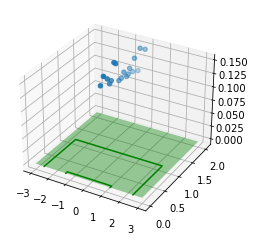

In [382]:
plotPoints(trainset)

<Axes3DSubplot:>

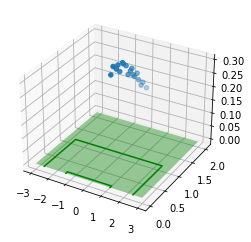

In [383]:
plotPoints(trainset2)

In [384]:
x = gettingX(1/60,1/3,1/60)
print(len(x))

20


In [385]:
thetaX = [random.random(),random.random()]
linearRegression(a,x,dataset[0],thetaX,err)

2535
0.00035865602281041843


In [386]:
thetaY = [random.random(),random.random()]
linearRegression(a,x,dataset[1],thetaY,err)

2816
5.7388030425869174e-05


In [387]:
thetaZ = [random.random(),random.random()]
linearRegression(a,x,dataset[2],thetaZ,err)

2093
9.727562323366005e-05


In [388]:
Xline = []
Yline = []
Zline = []
for i in x:
    Xline.append(linearH(thetaX,i))
    Yline.append(linearH(thetaY,i))
    Zline.append(linearH(thetaZ,i))

In [389]:
print(thetaX)
print(thetaY)
print(thetaZ)

[-0.20739999684315596, -2.9731458389839243]
[2.100403179730674, -2.9928764972142305]
[0.12474881464349026, -0.029423340629786306]


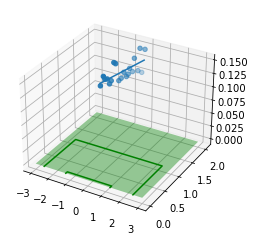

In [390]:
plotPolynom(dataset,Xline,Yline,Zline)

In [391]:
thetaX2 = [random.uniform(-1,1),random.uniform(-1,1)]
linearRegression(a,x,dataset2[0],thetaX2,err)

2510
0.00012339238873141002


In [392]:
thetaY2 = [random.uniform(0,2),random.uniform(0,2)]
linearRegression(a,x,dataset2[1],thetaY2,err)

2882
5.738803074613999e-05


In [393]:
thetaZ2 = [random.random(),random.random()]
linearRegression(a,x,dataset2[2],thetaZ2,0.0001)

764
0.00014804450553955207


In [394]:
Xline2 = []
Yline2 = []
Zline2 = []
for i in x:
    Xline2.append(linearH(thetaX2,i))
    Yline2.append(linearH(thetaY2,i))
    Zline2.append(linearH(thetaZ2,i))

In [395]:
print(Xline2)

[-0.1301593112359252, -0.1546899420646705, -0.17922057289341575, -0.20375120372216105, -0.22828183455090634, -0.2528124653796516, -0.27734309620839687, -0.30187372703714216, -0.32640435786588745, -0.35093498869463274, -0.375465619523378, -0.3999962503521233, -0.4245268811808686, -0.44905751200961386, -0.47358814283835915, -0.49811877366710444, -0.5226494044958496, -0.5471800353245949, -0.5717106661533402, -0.5962412969820855]


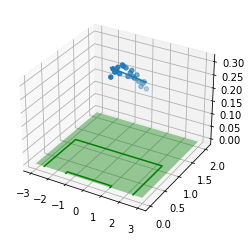

In [396]:
plotPolynom(dataset2,Xline2,Yline2,Zline2)

In [397]:
grau = 1
thetaXg1 = []
for i in range(grau+1):
    thetaXg1.append(random.uniform(-1,1))
polynomialRegression(a,x,dataset[0],thetaXg1,err,grau)

2584
0.00035865602385722945


In [398]:
grau = 1
thetaYg1 = []
for i in range(grau+1):
    thetaYg1.append(random.uniform(0,2))
polynomialRegression(a,x,dataset[1],thetaYg1,err,grau)

2851
5.73880304493769e-05


In [399]:
grau = 1
thetaZg1 = []
for i in range(grau+1):
    thetaZg1.append(random.random())
polynomialRegression(a,x,dataset[2],thetaZg1,err,grau)

2375
9.727562336117799e-05


In [400]:
Xlineg1 = []
Ylineg1 = []
Zlineg1 = []
for i in x:
    Xlineg1.append(generalH(thetaXg1,i))
    Ylineg1.append(generalH(thetaYg1,i))
    Zlineg1.append(generalH(thetaZg1,i))

In [401]:
print(thetaXg1)
print(thetaYg1)
print(thetaZg1)

[-0.2074000578404352, -2.9731454935508435]
[2.1004031763016324, -2.9928764777952606]
[0.1247488003638812, -0.029423259763075246]


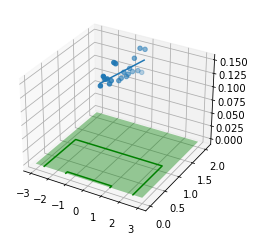

In [402]:
plotPolynom(dataset,Xlineg1,Ylineg1,Zlineg1)

In [403]:
grau = 1
thetaXg2 = []
for i in range(grau+1):
    thetaXg2.append(random.uniform(-1,1))
polynomialRegression(a,x,dataset[0],thetaXg2,err,grau)

2503
0.0003586560233142536


In [404]:
grau = 1
thetaYg2 = []
for i in range(grau+1):
    thetaYg2.append(random.uniform(0,2))
polynomialRegression(a,x,dataset[1],thetaYg2,err,grau)

2798
5.738803036185342e-05


In [405]:
grau = 2
thetaZg2 = []
for i in range(grau+1):
    thetaZg2.append(random.random())
polynomialRegression(a,x,dataset[2],thetaZg2,err,grau)

70001
9.251268700463451e-05


In [406]:
Xlineg2 = []
Ylineg2 = []
Zlineg2 = []
for i in x:
    Xlineg2.append(generalH(thetaXg2,i))
    Ylineg2.append(generalH(thetaYg2,i))
    Zlineg2.append(generalH(thetaZg2,i))

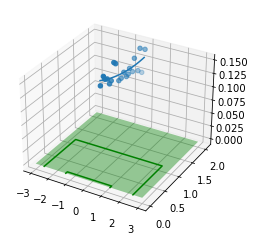

In [407]:
plotPolynom(dataset,Xlineg2,Ylineg2,Zlineg2)

In [408]:
grau = 1
thetaXg5 = []
for i in range(grau+1):
    thetaXg5.append(random.uniform(-1,1))
polynomialRegression(a,x,dataset[0],thetaXg5,err,grau)

2502
0.0003586560216553991


In [409]:
grau = 1
thetaYg5 = []
for i in range(grau+1):
    thetaYg5.append(random.uniform(0,2))
polynomialRegression(a,x,dataset[1],thetaYg5,err,grau)

2825
5.73880307341709e-05


In [410]:
grau = 5
thetaZg5 = []
for i in range(grau+1):
    thetaZg5.append(random.random())
polynomialRegression(a,x,dataset[2],thetaZg5,err,grau)

70001
9.340961211303752e-05


In [411]:
Xlineg5 = []
Ylineg5 = []
Zlineg5 = []
for i in x:
    Xlineg5.append(generalH(thetaXg5,i))
    Ylineg5.append(generalH(thetaYg5,i))
    Zlineg5.append(generalH(thetaZg5,i))

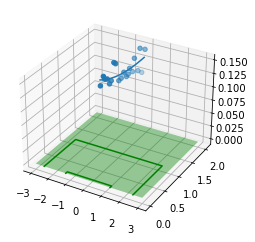

In [412]:
plotPolynom(dataset,Xlineg5,Ylineg5,Zlineg5)

In [413]:
grau = 1
thetaXg10 = []
for i in range(grau+1):
    thetaXg10.append(random.uniform(-1,1))
polynomialRegression(a,x,dataset[0],thetaXg10,err,grau)

2567
0.0003586560234038026


In [414]:
print(thetaXg10)

[-0.20740003142736982, -2.9731456431304095]


In [415]:
grau = 1
thetaYg10 = []
for i in range(grau+1):
    thetaYg10.append(random.uniform(0,2))
polynomialRegression(a,x,dataset[1],thetaYg10,err,grau)

2856
5.738803071037357e-05


In [416]:
grau = 10
thetaZg10 = []
for i in range(grau+1):
    thetaZg10.append(random.random())
polynomialRegression(a,x,dataset[2],thetaZg10,err,grau)

70001
9.547210279875476e-05


In [417]:
Xlineg10 = []
Ylineg10 = []
Zlineg10 = []
for i in x:
    Xlineg10.append(generalH(thetaXg10,i))
    Ylineg10.append(generalH(thetaYg10,i))
    Zlineg10.append(generalH(thetaZg10,i))

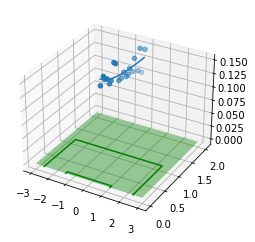

In [418]:
plotPolynom(dataset,Xlineg10,Ylineg10,Zlineg10)

In [419]:
grau = 1
thetaXg20 = []
for i in range(grau+1):
    thetaXg20.append(random.uniform(-1,1))
polynomialRegression(a,x,dataset[0],thetaXg20,err,grau)

2420
0.00035865602179963307


In [420]:
grau = 1
thetaYg20 = []
for i in range(grau+1):
    thetaYg20.append(random.uniform(0,2))
polynomialRegression(a,x,dataset[1],thetaYg20,err,grau)

2914
5.738803071440384e-05


In [421]:
grau = 20
thetaZg20 = []
for i in range(grau+1):
    thetaZg20.append(random.random())
polynomialRegression(a,x,dataset[2],thetaZg20,err,grau)

70001
9.606985682124743e-05


In [422]:
Xlineg20 = []
Ylineg20 = []
Zlineg20 = []
for i in x:
    Xlineg20.append(generalH(thetaXg20,i))
    Ylineg20.append(generalH(thetaYg20,i))
    Zlineg20.append(generalH(thetaZg20,i))

In [423]:
print(thetaXg20)
print(thetaYg20)
print(thetaZg20)

[-0.20739993788406946, -2.9731461728745363]
[2.100403137677362, -2.992876259062542]
[0.129546753494055, -0.07257656419478867, -0.13326012076369304, 0.5358996428882623, 0.6907819093939959, 0.5397297175283371, 0.8620849202512071, 0.3087044635804021, 0.6934705425794744, 0.5937257688916001, 0.5796714297809938, 0.45612838340034023, 0.839941499119329, 0.9446721590810054, 0.47409530831530056, 0.6641511808554422, 0.06066908153871735, 0.7014919045583231, 0.6471288151773301, 0.9930959262129384, 0.8219247821484844]


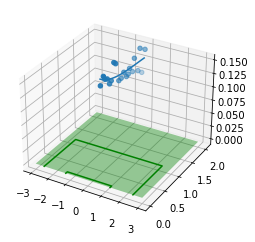

In [424]:
plotPolynom(dataset,Xlineg20,Ylineg20,Zlineg20)

In [425]:
grau = 1
theta2Xg1 = []
for i in range(grau+1):
    theta2Xg1.append(random.uniform(-1,1))
polynomialRegression(a,x,dataset2[0],theta2Xg1,err,grau)

2448
0.0001233923889507411


In [426]:
grau = 1
theta2Yg1 = []
for i in range(grau+1):
    theta2Yg1.append(random.uniform(0,2))
polynomialRegression(a,x,dataset2[1],theta2Yg1,err,grau)

2803
5.7388030573159076e-05


In [427]:
grau = 1
theta2Zg1 = []
for i in range(grau+1):
    theta2Zg1.append(random.random())
polynomialRegression(a,x,dataset2[2],theta2Zg1,err,grau)

2042
0.00014599520191454276


In [428]:
Xline2g1 = []
Yline2g1 = []
Zline2g1 = []
for i in x:
    Xline2g1.append(generalH(theta2Xg1,i))
    Yline2g1.append(generalH(theta2Yg1,i))
    Zline2g1.append(generalH(theta2Zg1,i))

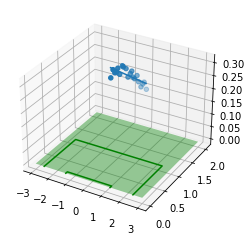

In [429]:
plotPolynom(dataset2,Xline2g1,Yline2g1,Zline2g1)

In [430]:
grau = 1
theta2Xg2 = []
for i in range(grau+1):
    theta2Xg2.append(random.uniform(-1,1))
polynomialRegression(a,x,dataset2[0],theta2Xg2,err,grau)

2278
0.00012339238886768515


In [431]:
grau = 1
theta2Yg2 = []
for i in range(grau+1):
    theta2Yg2.append(random.uniform(0,2))
polynomialRegression(a,x,dataset2[1],theta2Yg2,err,grau)

2818
5.738803070776252e-05


In [432]:
grau = 2
theta2Zg2 = []
for i in range(grau+1):
    theta2Zg2.append(random.random())
polynomialRegression(a,x,dataset2[2],theta2Zg2,err,grau)

70001
7.657729331821731e-05


In [433]:
Xline2g2 = []
Yline2g2 = []
Zline2g2 = []
for i in x:
    Xline2g2.append(generalH(theta2Xg2,i))
    Yline2g2.append(generalH(theta2Yg2,i))
    Zline2g2.append(generalH(theta2Zg2,i))

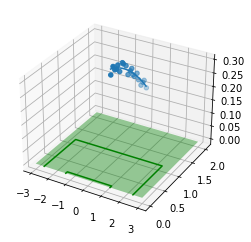

In [434]:
plotPolynom(dataset2,Xline2g2,Yline2g2,Zline2g2)

In [435]:
grau = 1
theta2Xg5 = []
for i in range(grau+1):
    theta2Xg5.append(random.uniform(-1,1))
polynomialRegression(a,x,dataset2[0],theta2Xg5,err,grau)

2488
0.00012339238847875348


In [436]:
grau = 1
theta2Yg5 = []
for i in range(grau+1):
    theta2Yg5.append(random.uniform(0,2))
polynomialRegression(a,x,dataset2[1],theta2Yg5,err,grau)

2926
5.738803064534798e-05


In [437]:
grau = 5
theta2Zg5 = []
for i in range(grau+1):
    theta2Zg5.append(random.random())
polynomialRegression(a,x,dataset2[2],theta2Zg5,err,grau)

70001
7.127657364245541e-05


In [438]:
Xline2g5 = []
Yline2g5 = []
Zline2g5 = []
for i in x:
    Xline2g5.append(generalH(theta2Xg5,i))
    Yline2g5.append(generalH(theta2Yg5,i))
    Zline2g5.append(generalH(theta2Zg5,i))

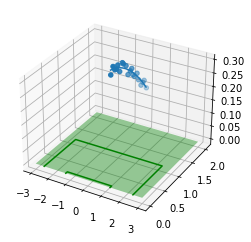

In [439]:
plotPolynom(dataset2,Xline2g5,Yline2g5,Zline2g5)

In [440]:
grau = 1
theta2Xg10 = []
for i in range(grau+1):
    theta2Xg10.append(random.uniform(-1,1))
polynomialRegression(a,x,dataset2[0],theta2Xg10,err,grau)

2230
0.00012339238823059153


In [441]:
grau = 1
theta2Yg10 = []
for i in range(grau+1):
    theta2Yg10.append(random.uniform(0,2))
polynomialRegression(a,x,dataset2[1],theta2Yg10,err,grau)

2851
5.7388030404083216e-05


In [442]:
grau = 10
theta2Zg10 = []
for i in range(grau+1):
    theta2Zg10.append(random.random())
polynomialRegression(a,x,dataset2[2],theta2Zg10,err,grau)

70001
7.01945290652891e-05


In [443]:
Xline2g10 = []
Yline2g10 = []
Zline2g10 = []
for i in x:
    Xline2g10.append(generalH(theta2Xg10,i))
    Yline2g10.append(generalH(theta2Yg10,i))
    Zline2g10.append(generalH(theta2Zg10,i))

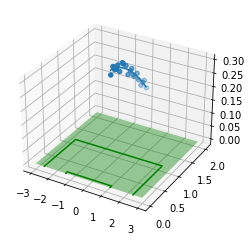

In [444]:
plotPolynom(dataset2,Xline2g10,Yline2g10,Zline2g10)